## Part 2 - MIDAS TASK 2
#### AIM 
    1) Pretrained the intial model from 0-9 images of part 1 dataset
    2) Train and Testing on the Mnist DATASET 
    
#### FLOW :
1) training The part 1 model for digits 0-9
2) Loading the Mnist Dataset
3) Visuaization of the Mnist dataset
4) loading the pretrained Model
5) Training the Mnist dataset on the pretrained model
4) Plotting the result
5) Final Overview

## Intial model explained in part 
##### Modification : 
1) Training set is only the 0 to 9 Digits
2) training split = 0.9 & validation split = 0.1

Rest The model is same and is well explained in part 1

In [5]:
import os
import zipfile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D, BatchNormalization, Add# convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input# core layers
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

from platform import python_version


In [6]:
print('phython version     : ' + (python_version()))
print('numpy version       : ' + np.__version__)
print('Tensorflow version  : ' + tf.__version__)
print('matplotlib version  : ' + matplotlib.__version__)


phython version     : 3.7.10
numpy version       : 1.19.5
Tensorflow version  : 2.4.1
matplotlib version  : 3.2.2


In [7]:
local_zip = '/content/trainPart1 for pretraining.zip'
zip_ref   = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/imgclassifi')
zip_ref.close()

In [8]:
train_dir = os.path.join('tmp/imgclassifi/train')
sub_dir = [os.path.join(train_dir,o) for o in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir,o))]
sub_dir.sort()
sub_dir

['tmp/imgclassifi/train/0',
 'tmp/imgclassifi/train/1',
 'tmp/imgclassifi/train/2',
 'tmp/imgclassifi/train/3',
 'tmp/imgclassifi/train/4',
 'tmp/imgclassifi/train/5',
 'tmp/imgclassifi/train/6',
 'tmp/imgclassifi/train/7',
 'tmp/imgclassifi/train/8',
 'tmp/imgclassifi/train/9']

In [9]:
i_index = 0

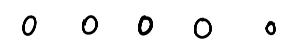

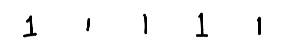

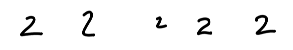

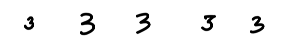

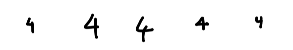

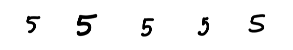

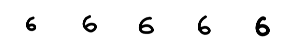

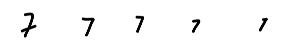

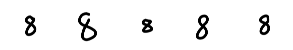

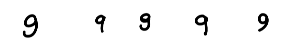

In [10]:
num_img = 5
f_index = i_index + num_img
#fig = plt.gcf()
#fig.set_size_inches(4*2,4*2)

for j in range(len(sub_dir)):
    
    fig = plt.gcf()
    fig.set_size_inches(num_img*1,num_img*1)
                        
    for i,img in enumerate(os.listdir(sub_dir[j])[i_index:f_index]):
                        
        sp = plt.subplot(num_img,num_img,i+1)
        sp.axis('off')
                        
        img_path = os.path.join(sub_dir[j],img)
        image   = mpimg.imread(img_path)
        plt.imshow(image)
                        
    plt.show()

i_index = f_index

In [18]:
## CNN MODEL
def build_model():
  inp = Input(shape = (28,28,1))
  x1  = Conv2D(filters=64, kernel_size = (3,3), activation="relu",  kernel_initializer= 'he_normal')(inp)
  x1  = Conv2D(filters=64, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x1)
  x1  = MaxPooling2D(pool_size=(2,2))(x1)
  x1  = Dropout(0.20)(x1)
  x1  = BatchNormalization()(x1)

  x2  = Conv2D(filters=128, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x1)
  x2  = Conv2D(filters=256, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x2)
  x2  = MaxPooling2D(pool_size=(2,2))(x2)
  x2  = Dropout(0.25)(x2)
  x2  = BatchNormalization()(x2)


  #x3  = Add()([x1,x2])
  x3  = Conv2D(filters=256, kernel_size = (3,3), activation="relu", kernel_initializer= 'he_normal')(x2)
  #x3  = Conv2D(filters=128, kernel_size = (3,3), activation="relu")(x2)
  x3  = MaxPooling2D(pool_size=(2,2))(x3)
  x3  = Dropout(0.25)(x3)
  x3  = Flatten()(x3)
  x3  = BatchNormalization()(x3)

  x4  = Add()([x2,x3])                        # skip connection

  x4  = Dense(512,activation="relu")(x4)
  x4  = Dropout(0.20)(x4)
  out  = Dense(10,activation="softmax")(x3)   #Here We have 10 classes
  
  return tf.keras.Model(inp,out)



model = build_model()


# CALLBACKS
rlr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)
ckp = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy',verbose = 1, save_best_only = True, mode = 'max')

#MODEL COMPILE    
model.compile(loss="categorical_crossentropy",optimizer=tf.optimizers.Adam(learning_rate = 0.01), metrics=["accuracy"])

#EPOUCH AND BATCH SIZE

batchsize = 32
EPOUCH    = 60

#DATA GENERATOR - DATA PREPROCESSING AND ARGUMENTATION

train_datagen = ImageDataGenerator(  
       
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range= 10,     
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False,
        validation_split =0.10)



train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(28,28),  # All images will be resized to 28*28
        batch_size=batchsize,
        color_mode = "grayscale",
        class_mode='categorical',
        subset = 'training')
        

validation_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(28,28),  # All images will be resized to 28*28
        batch_size=batchsize,
        color_mode = "grayscale",
        class_mode='categorical',
        subset = 'validation')



Found 360 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [19]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 128)       7385

In [20]:

history = model.fit_generator(train_generator,steps_per_epoch= 360/batchsize,epochs = EPOUCH ,verbose=1,validation_data=validation_generator, callbacks=[rlr,ckp])




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
11/11 [==============================] - 7s 527ms/step - loss: 3.0010 - accuracy: 0.1657 - val_loss: 678.0187 - val_accuracy: 0.1000

Epoch 00001: val_accuracy improved from -inf to 0.10000, saving model to best_model.h5
Epoch 2/60
11/11 [==============================] - 5s 471ms/step - loss: 2.0570 - accuracy: 0.3364 - val_loss: 332.1842 - val_accuracy: 0.1000

Epoch 00002: val_accuracy did not improve from 0.10000
Epoch 3/60
11/11 [==============================] - 5s 476ms/step - loss: 1.4387 - accuracy: 0.4917 - val_loss: 87.5329 - val_accuracy: 0.1250

Epoch 00003: val_accuracy improved from 0.10000 to 0.12500, saving model to best_model.h5
Epoch 4/60
11/11 [==============================] - 5s 474ms/step - loss: 0.9622 - accuracy: 0.6783 - val_loss: 67.7283 - val_accuracy: 0.1500

Epoch 00004: val_accuracy improved from 0.12500 to 0.15000, saving model to best_model.h5
Epoch 5/60
11/11 [==============================] - 5s 472ms/step - loss: 0.8590 - accuracy: 0.7114 

##### Accuracy for the above model
1: Best validation accuracy = 95 %
2: Testing accuracy = 95.54%


## Loading the pretrained model
we save the model having the best validation accuracy in the file 'best_model.h5' using the Modelchechkpoint,Now I am loading and oberserving the model summary.

In [32]:
model =  tf.keras.models.load_model('best_model.h5')
model.summary()
model

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 128)       7385

# Downloading the dataset
Here I am using the tensorflow api to load the MNIST DATA

In [33]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#### traing set and test set shapes

we have around 60000 train images and 10000 test images

In [34]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


## visualization of the Images

##### point to observe:
in this case the image background is white and the digits is of white colour, while in the our pretrained model dataset, the images are of white background with digits is of black colour.

###### Note : I trained the model with colour inversion also  but the result is almost same in both the cases,I have explained the model with color inversion in the experiment log which is uploaded in Repo.The Reason why we are getting the same result is more likely because we have a pretrained model which is trained on less no. of that kind of images.

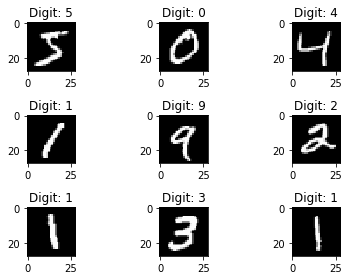

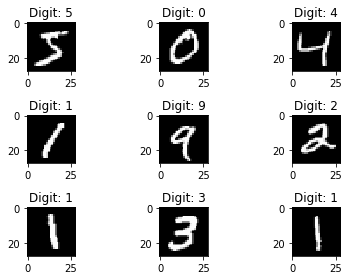

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
fig

##### Reshaping the train set as per the keras requirement

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## one hot encoding 


In [37]:
from keras.utils import np_utils
n_classes = 10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## Training the model

In [38]:
history1 = model.fit(X_train, Y_train, batch_size= 128, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 8s 16ms/step - loss: 0.2868 - accuracy: 0.9181 - val_loss: 3.0434 - val_accuracy: 0.1135
Epoch 2/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0794 - accuracy: 0.9761 - val_loss: 1.7684 - val_accuracy: 0.3490
Epoch 3/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0549 - accuracy: 0.9834 - val_loss: 0.0534 - val_accuracy: 0.9860
Epoch 4/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.0248 - val_accuracy: 0.9924
Epoch 5/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0259 - val_accuracy: 0.9923
Epoch 6/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0222 - val_accuracy: 0.9931
Epoch 7/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0210 - val_accuracy: 0.9937

## Plotting the result

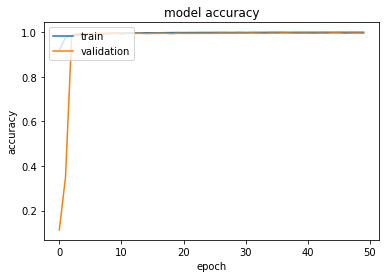

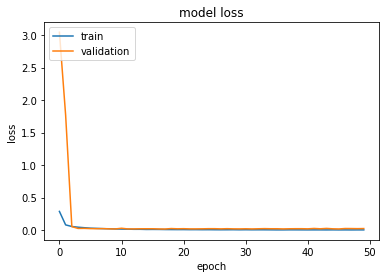

In [39]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# FInal OVERVIEW

##### Results   :
   ###### Testing accuracy  =  99.50%
   ###### Training accuracy =  99.91%
   
The model is performing well with the mnist dataset,the particular reason is we have more ammount of the data and so the model learned extremly well and easiy able to classify the correct results with the testing accuracy of 99.50%,

Regarding the use of pretrained model : As far as my understanding is concerned The pretrained model didnot helps us much, i have also Trained the Mnist dataset on the neat model(without the pretrained one) and i got the approximate same result.The Reason i have already specifed is that we have used less data for the preatrained Model.  